# Exercise Sheet 1.1 - Text Processing with Python and NLTK


## Learning Objectives

The motivation of this exercise is to incorporate what you have learned about text processing using Python in **Exercise Sheet 1.0** with the NLTK library. The NLTK is short for the Natural Language Toolkit and it "*is a suite of open source Python modules, data sets, and tutorials supporting research and development in NLP.*"

---
### References
#### This notebook was adapted from Chapter 1 of the book [Natural Language Processing with Python](http://www.nltk.org/book/).

----
# 1. Getting Started With NLTK
If you are working with this notebook on Google Colab or already have `nltk` installed on your machine, you should be able to run the following code cell without any errors. 

Otherwise, you may seen an an `ImportError`, which means you need to install the `nltk` python package. From a command prompt, this will usually look like "`pip install nltk`", or "`conda install nltk`" if you're using Anaconda. You can also run these commands in the notebook itself: typing `!` in a code cell before the command tells Jupyter it should be executed in the console (remember `!curl` in the previous excercise sheet?). 

```
!pip install nltk
```

You'll see `In [*]` to the left of the cell while nltk is importing (perhaps a few seconds), then `In [1]` when it's done and the kernel is ready to accept more commands. The "`1`" indicates it's the first cell to have been executed. Note that you can queue cells for execution, and they'll all show a `[*]` until they've executed.

In [ ]:
import nltk

NLTK has a variety of text resources that can be used as examples and as training and test data for NLP models. There is a convenient application for downloading and accessing these resources: `nltk.download()`. When executed it launches a GUI interface that allows you to select and download these resources. Execute the following cell and click on the "book" collection then click "download". This collection contains all the resources used as teaching examples in the NLTK book and in this notebook. Note that this need only be done once per installation. 

> __Beware__: the GUI will launch on the computer where the jupyter notebook server is running. If you are not running the server locally, running the following cell will not work as expected!

In [ ]:
nltk.download('book')

# It is better to download all the nltk package in order not to encounter any 
# errors related to missing nltk packages run the following commands 
# but this usualy takes a while. You can do that using the following command:
# nltk.download('all')

Now that the resources have been downloaded, you can access them as in the following cell. Each of the texts is an object with class `Text` — we'll see more about the functionalities of that class later, or you can have a look at the class in the [NLTK documentation](http://www.nltk.org/api/nltk.html?highlight=text#nltk.text.Text).

In [ ]:
from nltk.book import *

Simply typing the name of a text will return its name. For instance the first text is **Moby Dick** and the second text is **Sense and Sensibility**.

In [ ]:
text1

In [ ]:
text2

## 2.1 Searching Text

---


There are many ways to investigate a text. The `concordance()` method looks up every occurrence of a word and prints out it's context in the text. The following cell prints a concordance on the word "monstrous" from `text1`, which is _Moby Dick_ (a famous American novel). The results will be presented in the so-called **KWIC** format, which stands for _key word in context_.

> __Try this:__ Look a few other concordances, such as "affection" in _Sense and Sensibility_, using `text2.concordance("affection")` or "lived" in _Genesis_ (`text3`). You could look at `text1`, the _Moby Dick by Herman Melville 1851_, to see examples of English going back to 1789, and search for words like "nation", "terror", "god" to see how these words have been used differently over time. We've also included `text5`, the _NPS Chat Corpus_: search this for unconventional words like "im", "ur", "lol". (Note that this corpus is uncensored!)

In [ ]:
text1.concordance("very")

Another interesting method of `Text` objects is `similar()`. This lists words that appear in similar contexts to a word. Here, the context is the words immediately before or after an appearance of the given word (e.g. "monstrous"). According to the distributional hypothesis, these words relate to the same ideas in the text as the searched word.

In [ ]:
text1.similar("monstrous")

In [ ]:
text2.similar("monstrous")

The `common_contexts()` method finds contexts of two words that match. For example "very" is the most similar to "monstrous" in `text2`. Looking at the common contexts, we can see that "monstrous" is being used as an adjective in a similar way to "very".

Have a play with some other pairs of words.

In [ ]:
text2.common_contexts(["monstrous", "very"])

## 2.2 Counting Vocabulary
This section investigates the vocabulary, or list of words used in a text, and introduces function definitions and some useful utilites and data types.

**Texts** in NLTK are represented as a sequence of words and punctuation symbols, or **tokens**. In python, a _sequence_ is a sequential collection of things that can be accessed by their integer index with a known length.

To get the number of tokens (words and puncuation symbols) in a text, we can use the Python builtin function `len()`:

In [ ]:
# The number of tokens in text1, Moby Dick
len(text1)

To see the set of unique tokens (= **types**) in a text, called **vocabulary**, we can use the python `set` type. A `set` is an unordered collection of objects, all of which are distinct. Adding an object to a set that is already there doesn't change the set. In the cell below, we use the `sorted()` python builtin function, which produces a sorted version of the vocabulary.

The resulting list is fairly long, which can be inconvenient in a notebook. To reduce the space it uses, click in the left margin: it'll be put into a scroll box. You can double click to make it go away entirely or click to make it come back to full size.

In [ ]:
# vocabulary of text3
sorted(set(text3))

The `len()` builtin function can be applied to a set, returning the number of objects it contains.

In [ ]:
# size of the vocabulary of text3
len(set(text3))

Now we can calculate a texts lexical diversity (a measure of average token frequency).

In [ ]:
# lexical diversity
len(set(text3))/ float(len(text3))

The `Text` class has a convenient `count()` method that counts the number of occurences of a token. That allows us to easily calculate the frequency of a word in a text.

> __Try This:__ Find the frequency of "lol" in text5.

In [ ]:
# word frequency
text1.count('a') / float(len(text1))

Since we may want to calculate word frequency many times for different texts, we can make a function for it.

In [ ]:
def word_frequency(word, text):
    return text.count(word)/ float(len(text))

word_frequency('a', text1)

Similarly, we can create a function to calculate the lexical diversity.

In [ ]:
def lexical_diversity(text):
    return len(set(text)) / float(len(text))

lexical_diversity(text3)

## 3. Frequency Distributions

Let's say we want to identify words that are most informative about the topic and genre of a text. A good place to start would be to find the 50 most frequent words in the text. One method would be to keep a tally for each vocabulary item, something which we did in Exercise 0. 

A table with the counts of words for a book or any piece of text is called the **Frequency Distribution**. It is a *distribution* because it tells us how the total number of word tokens in the text is distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them.

In [ ]:
# find the frequency distribution for Moby Dick
fdist1 = FreqDist(text1)

The above cell found the frequency distribution and saved it in the variable `fdist`. We can find the 50 most frequent words by calling the `most_common` method.

In [ ]:
fdist1.most_common(50)

### Stopwords

The 50 most common words are not very informative about the topic of the text. Only one word, whale, which occurs over 900 times is slightly informative. The rest of the words tell us nothing about the text; they're just English "plumbing", or **function words** as we call them in linguistics.

We can find what proportion of the text is taken up with such words. To do that we will make a cumulative frequency plot for these words, using the `fdist1.plot()` method.

In [ ]:
fdist1.plot(50, cumulative=True)

These 50 words account for more than 120,000 words out of the total 260,819 words, which is nearly half of the book. We can safely remove them without losing any valuable information, and NLTK provides functionality for it. There are lists of the so-called **stopwords** in the `nltk.corpus` module for a few languages.



In [ ]:
from nltk.corpus import stopwords

# let's see what languages are available
stopwords.fileids()

In [ ]:
# let's have a look at the English stop word list
stops = set(stopwords.words('english'))
print(stops)

In [ ]:
# lowercase the text and get rid of stopwords

text1_clean = [w.lower() for w in text1]
text1_clean  = [w for w in text1_clean if w not in stops]
len(text1_clean)

Punctuation is also not very informative for our task, so we can remove it too.

There is a builtin variable `punctuation` in the Python `string` module. You can use it or create your own, more extensive one. 

In [ ]:
from string import punctuation

#builtin
print(punctuation)

#custom
punct = punctuation + '—«»–„“‘’'
print(punct)

In [ ]:
text1_clean = [w.strip(punct) for w in text1_clean]
text1_clean  = [w for w in text1_clean if w not in punct]
len(text1_clean)

Now, let's see the 25 most common words after removing the stopwords and punctuation. It looks much better, but there is still room for improvement. Would you add any of these words to the stopword list?

In [ ]:
fdist1_clean = FreqDist(text1_clean)
fdist1_clean.most_common(25)

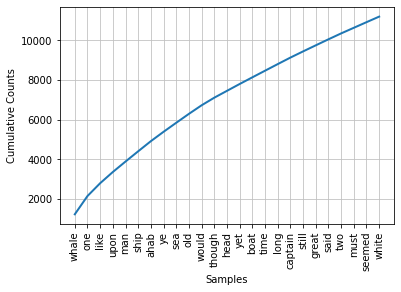

In [ ]:
fdist1_clean.plot(25, cumulative=True)

### Hapaxes

We can also look at the words which occur only once in the text. Such words are called **hapaxes** and we can see them by calling the `fdist1.hapaxes()` method.

In [ ]:
fdist1_clean.hapaxes()

In [ ]:
len(fdist1_clean.hapaxes())

There are too many words (over 7500) which occur only once in the text and again these are not too useful. Perhaps, we can look at longer words and see if they characteristic or informative of the text.

We can look at the words which are 15 or more characters in length. 

This can be done by iterating over all the words in the vocabulary and checking if they satisfy the criteria of having the length of 15 or more characters.

In [ ]:
# first create vocabulary for the text
vocab = set(text1_clean)

long_words = []

for word in vocab:
  if len(word) >= 15:
    long_words.append(word)

long_words

A more concise way to do the same thing in Python is by using list comprehension.

In [ ]:
long_words = [word for word in vocab if len(word) >= 15]
long_words

These long words are often hapaxes and may not typify the text accurately. Finally, for this exercise, we will look for those long words which also occur somewhat frequently.

In the cell below, we will look at words which are longer than 7 characters and occur more than 10 times in the text.

In [ ]:
[w for w in set(text1_clean) if len(w) > 7 and fdist1_clean[w] > 10]

We can also find the count for these words using the `text1.count()` function.

In [ ]:
long_frequent_words = [w for w in set(text1_clean) if len(w) > 7 and fdist1_clean[w] > 10]
counts = [(word, text1_clean.count(word)) for word in long_frequent_words]
counts[:25]

[('merchant', 19),
 ('thousand', 51),
 ('starting', 11),
 ('otherwise', 26),
 ('perilous', 15),
 ('monstrous', 11),
 ('reference', 14),
 ('straightway', 13),
 ('southern', 12),
 ('originally', 17),
 ('considering', 31),
 ('carpenter', 49),
 ('continually', 17),
 ('previous', 35),
 ('happened', 16),
 ('children', 18),
 ('mainmast', 11),
 ('tapering', 12),
 ('practical', 13),
 ('gentlemen', 38),
 ('appearance', 11),
 ('downwards', 12),
 ('mountains', 13),
 ('magnitude', 22),
 ('thousands', 16)]

And finally we can sort these words in decreasing order by their counts.

In [ ]:
sorted(counts, key=lambda x: x[1], reverse=True)[:25]

[('queequeg', 252),
 ('starbuck', 198),
 ('something', 123),
 ('leviathan', 96),
 ('nantucket', 96),
 ('sometimes', 87),
 ('standing', 82),
 ('harpooneer', 81),
 ('whalemen', 72),
 ('business', 68),
 ('therefore', 67),
 ('together', 64),
 ('tashtego', 57),
 ('harpooneers', 56),
 ('peculiar', 56),
 ('thousand', 51),
 ('suddenly', 50),
 ('nevertheless', 50),
 ('carpenter', 49),
 ('particular', 49),
 ('stranger', 48),
 ('straight', 46),
 ('whatever', 46),
 ('whaleman', 46),
 ('touching', 46)]

By looking at the words, we can guess that this text is related to sea and ships with words such as *mariners*, *swimming*, *shipmates*, *fishermen* and *overboard* occurring frequently.

---
#### Can you do the similar steps and find out what topic does `text4` cover?

In [ ]:
# Your code goes here

